# Module6: Julie Vuadens et Hoa-Ai Béatrice Hua
## Monte-Carlo

## Challenge 1
### Partie I
*Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above. *

### Partie II
*Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected.*

Comme d'habitude, nous commençons par importer toutes les librairies nécessaires.

In [1]:
from matplotlib import pyplot
from pylab import show,hist,subplot,figure 
import numpy
from numpy import cos, sin, random, log, sqrt, exp, pi
import random
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

### Partie I :

Nous travaillons d'abord sur la génération de nombres aléatoires sur plusieurs distributions:l'uniforme, l'exponentielle et la gaussienne. 


#### Distribution uniforme (sans générateur)
$$
p(x) = 
\begin{cases} \frac{1}{b-a} &\mbox{if } x\in [a,b] \\ 
0 & \mbox{otherwise } 
\end{cases} 
$$
et  $\int_{-\infty}^{\infty} p(x)dx = 1$ ,où p(x) est la densité de probabilité.

La distribution uniforme est la plus basique que l'on puisse utiliser. Elle repartie de manière uniforme des nombres aléatoires sur un intervalle $[a,b]$ donné.



In [2]:
a=5
b=20
x = numpy.random.random_sample(100000)
y = (b-a)*x+a

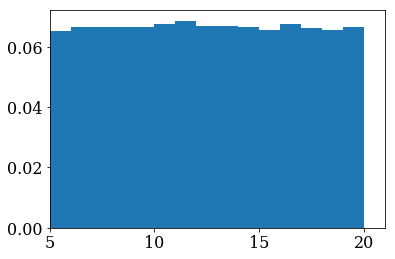

In [3]:
binwidth=1
pyplot.xlim(5,21)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=True);

#### Distribution uniforme (avec générateur)

"numpy.rando.uniform" importe un échantillon de valeur selon une distribution uniforme.

(array([ 0.0666 ,  0.06662,  0.06603,  0.06713,  0.06688,  0.06693,
         0.06746,  0.06722,  0.06631,  0.06614,  0.0659 ,  0.06711,
         0.06653,  0.0655 ,  0.06764]),
 array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
         16.,  17.,  18.,  19.,  20.]),
 <a list of 15 Patch objects>)

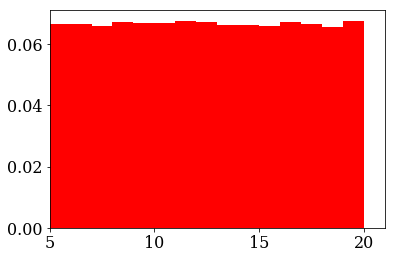

In [4]:
z = numpy.random.uniform(5,20,100000)
pyplot.xlim(5,21)
pyplot.hist(z,bins=numpy.arange(5.,21.,binwidth),normed=True,color='red')

#### Distribution exponentielle ( sans générateur)

Les nombres aléatoires sont générés selon la loi suivante:

$$
p(x)=
\begin{cases} 
\alpha e^{-\alpha x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} 
$$


$\alpha$ est le paramètre de la distribtion.


Cette distribution est très courante ( ex: radioactivité, etc)

**Attention: le code ci-dessous est donné dans le cours et nous le recopions juste afin de la comparer à une gaussienne générée comme indiqué dans les consignes **

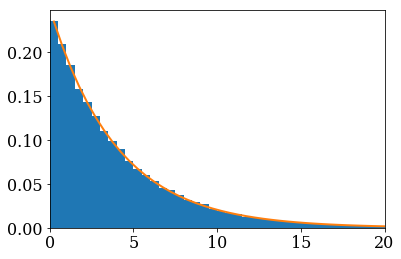

In [5]:
alpha = 0.25                           #Paramètre de la distribution
x = numpy.random.random_sample(100000)
y = -1/alpha*log(1-x)


binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);


#Courbe d'une distribution ideale pour comparer à l'histogramme
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*exp(-alpha*xc), lw=2)

#### Distribution exponentielle (avec générateur)

La fonction "numpy.random.exponential" permet d'obtenir un échantillon de valeurs distribué selon une loi exponentielle.

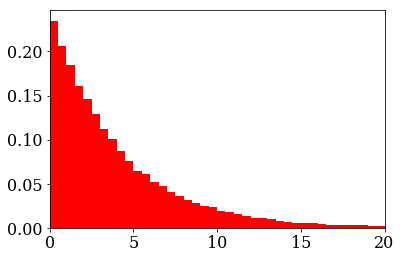

In [6]:
alpha = 0.25 
exp=numpy.random.exponential(4,100000)    

pyplot.xlim(0,20)

pyplot.hist(exp,bins,normed=True,color='red');


#### Distribution Gaussienne ( sans générateur)

$$
p(x)=\frac{1}{\sigma \sqrt{2\pi}} e^{-\frac12 (\frac{x-\mu}{\sigma})^2},
$$

où $\mu$ est la moyenne et $\sigma$ est l'écart-type.


Pour cette distribution, nous faisons appel à la méthode de réjection de Von Neumann qui consiste à générer un ensemble de nombres aléatoires avec une distribution $p_1(x)$ et d'en extraire un sous-ensemble de nombres qui obéissent à une distribution $p_2(x)$. Dans ce cas-ci , $p_1(x)$ est la distribution exponentielle et $p_2(x)$ est la gaussienne.

$$
{p_2(x)}\leq {Kp_1(x)},\quad \forall x.
$$

La condition ci-dessus doit s'applique afin que la méthode fonctionne. Le facteur K est une constante fixée à 1,4.
**Attention: le code ci-dessous est donné dans le cours et nous le recopions juste afin de la comparer à une gaussienne générée comme indiqué dans les consignes **

("Taux d'acceptance:", 0)


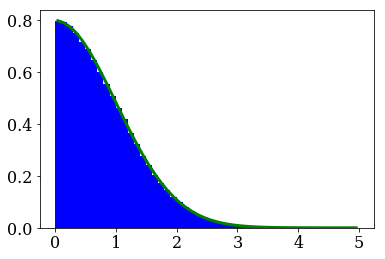

In [7]:
# Distribute g according to the exponential distribution
uniform1 = numpy.random.random_sample(1000000)
g = numpy.log(1/(1-uniform1))          

# Probabilty of drawing g according to the exponential distribution
p_g_exp = numpy.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = numpy.random.random_sample(1000000)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = numpy.extract(condition,g)

# Print the acceptance ratio
print("Taux d'acceptance:",h.size/g.size)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2.0*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')



#### Distribution gaussienne (avec générateur)

"numpy.random.normal" permet de générer un échantillon de valeurs distribuées selon une loi normale.

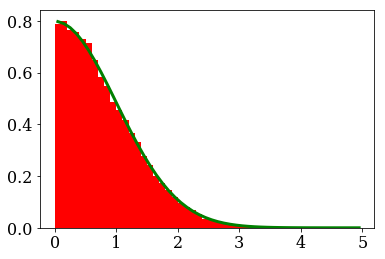

In [8]:
gauss=numpy.random.normal(0,1,100000)
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(gauss,bins=numpy.arange(0.,5., binwidth),normed=True,color='red');
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2.0*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

Nous voyons bien qu'il n'y a pas de différence entre les distributions implémentées et celles générées. Les deux méthodes sont donc correctes pour obtenir une séquence de nombres aléatoires. La distribution générée reste la plus simple au niveau de l'écriture et nous l'utiliserons donc souvent dans la suite. 

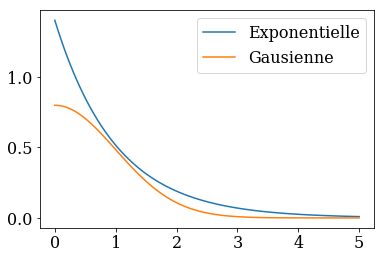

In [9]:
nx=100

xi =numpy.linspace(0,5,nx)

p2=2*numpy.exp(-xi**2/2.0)/numpy.sqrt(2*numpy.pi)  #Distribution gaussienne de moyenne 0 et d'écart-type 1
p1=1.4*numpy.exp(-numpy.abs(xi))                   #Distribution exponentielle multiplié par la constante K

pyplot.plot(xi,p1,label='Exponentielle')
pyplot.plot(xi,p2,label ='Gausienne')
pyplot.legend()

Nous voyons ci-dessus une illustration de la méthode de Von-Neumann avec $Kp_1(x)$ et $p_2(x)$.

###  Partie II : Méthode de Box Muller

Soient $U_1$ et $U_2$ deux variables aléatoires indépendantes et distribuées uniformément sur l'intervalle [0,1]. La méthode de Box Muller est telle que les variables aléatoires $Z_1$ et $Z_2$ suivent les lois suivantes :

$ Z_1 = \sqrt{-2ln(U_1)} cos(2 \pi U_2) $

$ Z_2 = \sqrt{-2ln(U_1)} sin(2 \pi U_2) $

Donc $Z_1$ et $Z_2$ sont des variables aléatoires indépendantes qui suivent une loi normale de variance 1.

Donc Box Muller converti des nombres aléatoires qui suivent une loi normale centrée réduite à partir d'une distribution uniforme de nombres aléatoires. Ici, nous utilisons la forme polaire de la méthode de Box Muller.

Ci-dessous, nous implémentons la méthode à l'aide de la fonction *Gaussian(u1,u2)* qui prend $u1$ et $u2$, 2 nombres aléatoires distribués uniformément sur $[0,1]$ et renvoi $z1$ et $z2$ des nombres qui suivent la loi normale.

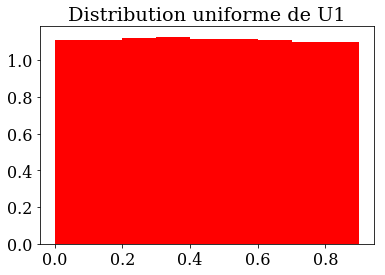

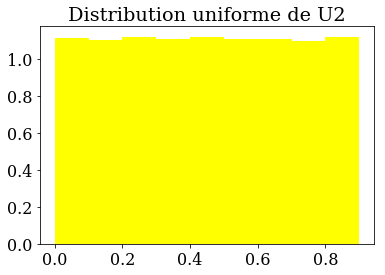

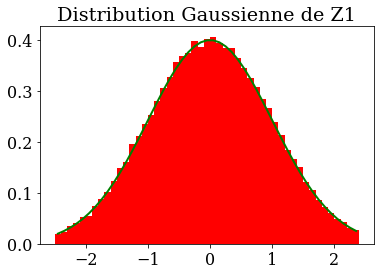

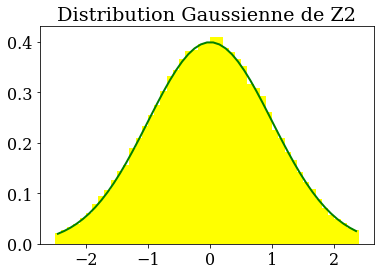

In [10]:
def gaussian(u1,u2):                                           
  z1 = sqrt(-2*log(u1))*cos(2*pi*u2)
  z2 = sqrt(-2*log(u1))*sin(2*pi*u2)
  return z1,z2

# valeurs distribuées uniformément entre 0 et 1
u1 = numpy.random.uniform(0,1.,100000)
u2 = numpy.random.uniform(0,1.,100000)

z1,z2 = gaussian(u1,u2)

#Nous dessinons les histogrammes des distributions initiales ( uniformes)
binwidth=0.1
bins=numpy.arange(0.,1., binwidth)
histu1=pyplot.hist(u1,bins,normed='true',color='red'); 
pyplot.title("Distribution uniforme de U1")
show(histu1)

binwidth=0.1
bins=numpy.arange(0.,1., binwidth)
histu2=pyplot.hist(u2,bins,normed='true',color='yellow');
pyplot.title("Distribution uniforme de U2")
show(histu2)

#Nous dessinons les histogrammes après application de Box-Muller et y ajustons une courbe gaussienne 
binwidth=0.1
bins=numpy.arange(-2.5,2.5, binwidth)
histz1=pyplot.hist(z1,bins,normed='true',color='red');
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=2,color='green')
pyplot.title("Distribution Gaussienne de Z1")
show(histz1)

binwidth=0.1
bins=numpy.arange(-2.5,2.5, binwidth)
histz2=pyplot.hist(z2,bins,normed='true',color='yellow');
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=2,color='green')
pyplot.title("Distribution Gaussienne de Z2")
show(histz2)


En effet, les distributions représentent bien une loi normale centrée réduite de moyenne $\mu$ =0 et d'écart-type $\sigma$ = 1. Nous pouvons l'affirmer en observant que les deux derniers histogrammes suivent la forme de la courbe verte qui dessine une courbe gaussienne idéale. Notre méthode de Box-Muller est donc correctement définie.

## Challenge 2 - Brownian Motion

### Partie I
*Add as systematic contribution to the displacement $dx$,*

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

*where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analitical solution for an initial Gaussian distribution?*

### Partie II
*Simulate the following random walk with a 'friction' term:*

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

*Check that the distribution reaches a steady state for $t\rightarrow \infty$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!*

### Partie I: Solution
Nous commençons par le déplacement avec une contribution systématique de $c$. Mais avant cela, nous générons la distribution initiale qui est gaussienne ici et définissons les constantes nécessaires.

In [11]:
alpha=2.0               #le coefficient de diffusion
npart=50000             #Le nombre de particules
sigma = 1.0             #L'écart-type donné dans l'énoncé
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)  #Distribution gaussienne générée centrée en 0 d'écart-type 1

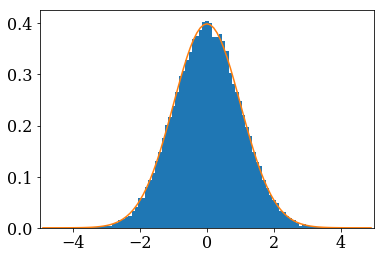

In [12]:
#Calcul des centres des bins afin d'ajuster une courbe gaussienne sur notre histogramme représentant la distribution initiale
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2
bin_centers = bins[:-1]+binwidth/2

pyplot.xlim(-5,5)
pyplot.hist(x0,bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

La courbe concorde bien avec la distribution. Nous pouvons donc y appliquer la diffusion brownienne dépendante d'un coefficient $c$. Nous implémentons l'évolution du système de telle sorte qu'elle dépende du temps afin que nous puissions faire varier la variable $T$ pour observer les distributions à des temps finaux différents.

In [13]:
def brownian(c,T):
    nt=2*T                                 #Nombre de pas de temps
    dt = 1./2.
    t = numpy.arange(0,T+dt,dt)            #Evolution dans le temps
    x = numpy.empty([nt+1,npart])          #Evolution dans l'espace 
    x[0]=x0

    for i in range(nt):
        x[i+1]=x[i]+ c*dt +numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)        #Déplacement de chaque particule 

    for i in range(20):                                     #Nous souhaitons voir l'évolution de 20 particules parmis les 50000
        plot1=pyplot.plot(t,x[:,i])
    show(plot1)

    #Calcul du centre des bins pour ajuster la distribution finale à une courbe centrée en c*T
    binwidth=0.5
    bins=numpy.arange(-300,300,binwidth)
    bins = bins + binwidth/2

    #histogramme de la distribution finale
    pyplot.hist(x[nt],bins,normed=True);
    pyplot.title('distribution pour c={} et pour T={}s'.format(c,T) )

    bin_centers = bins[:-1]+binwidth/2
    sigmat2=2*alpha*T+sigma**2
    pyplot.plot(bin_centers + c*T, numpy.exp(-bin_centers**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2),color='orange')

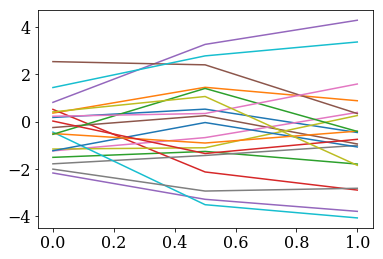

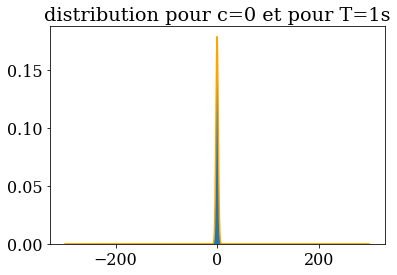

In [14]:
brownian(0,1)

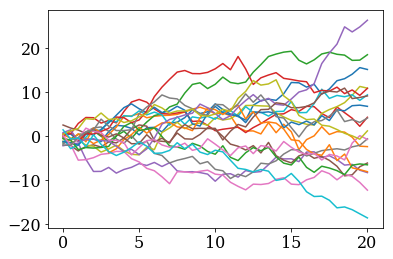

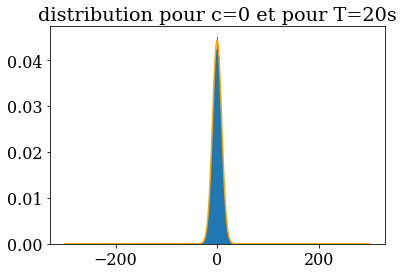

In [15]:
brownian(0,20)

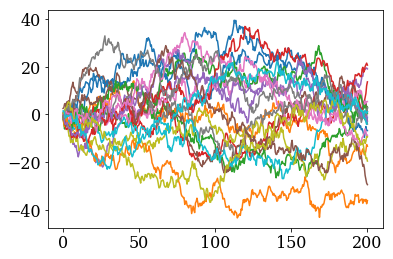

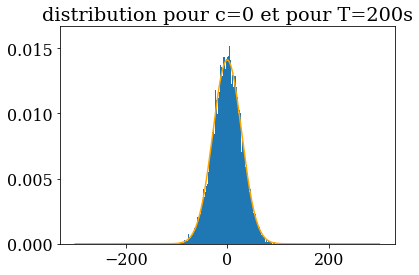

In [16]:
brownian(0,200)

Ici, nous avons défini c=0, nous observons donc bien une distribution centrée en 0 qui est bien ajustée à la courbe gausienne prédite.

Observons maintenant les distributions pour c=-0.5 et c=0.5  :

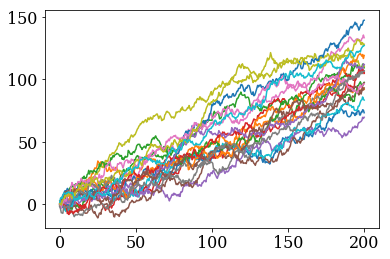

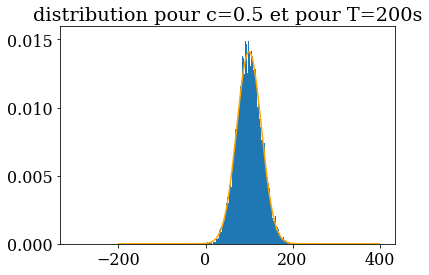

In [17]:
brownian(0.5,200)

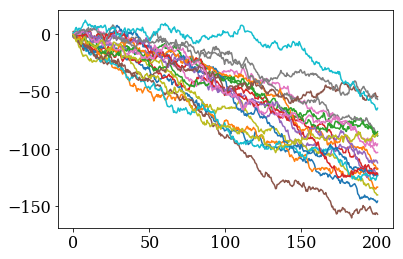

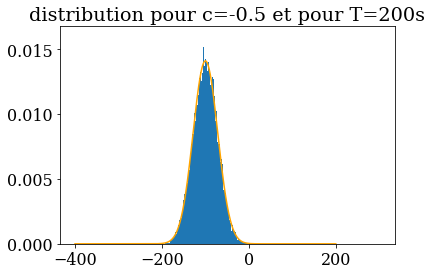

In [18]:
brownian(-0.5,200)

On observe que les distributions finales sont également des gaussiennes qui s'étalent au cours du temps. Cela nous parait cohérent puisque les particules vont avoir tendance à se disperser. D'après nos prévisions, pour chaque unité de temps, la distibution est translaté de $C$,le terme systématique ne fait donc que translater les gaussiennes de $cT$ et nous pouvons le remarquer sur les histogrammes.

### Partie II

Nous implémentons à présent la marche aléatoire avec un terme de friction dépendant du temps.

In [19]:
def brownian_2(gamma,T):
    nt=2*T
    dt=1./2.
    t = numpy.arange(0,T+dt,dt)
    x = numpy.empty([nt+1,npart])
    x[0]=x0

    for i in range(nt):
        x[i+1]=x[i] - gamma *x[i]*dt +numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

    for i in range(20):
        plot1=pyplot.plot(t,x[:,i])
    show(plot1)

    binwidth=0.5
    bins=numpy.arange(-20,20,binwidth)
    bins = bins + binwidth/2
    pyplot.hist(x[nt],bins,normed=True);
    pyplot.title('distribution pour gamma={} et pour T={}s'.format(gamma,T) )
    bin_centers = bins[:-1]+binwidth/2

    sigmat2=(alpha/gamma)   #Ecart-type théorique expliqué en dessous

    pyplot.plot(bin_centers,numpy.exp(-bin_centers**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

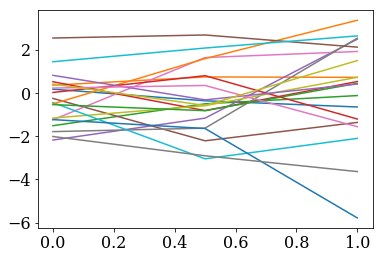

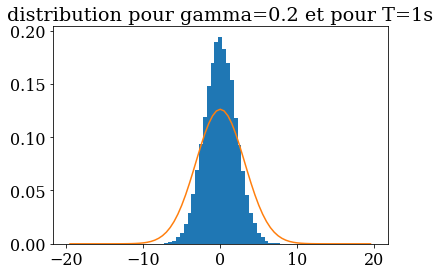

In [20]:
brownian_2(0.2,1)

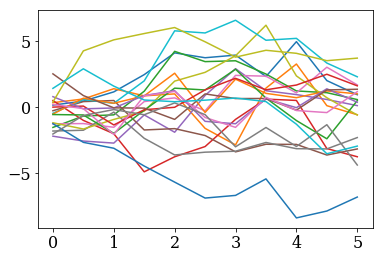

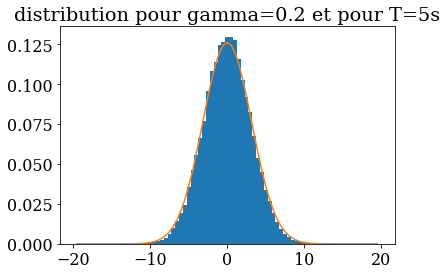

In [21]:
brownian_2(0.2,5)

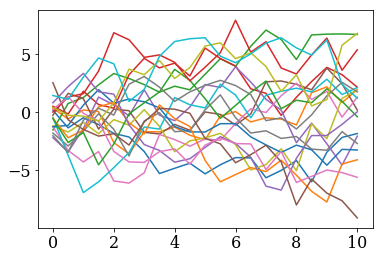

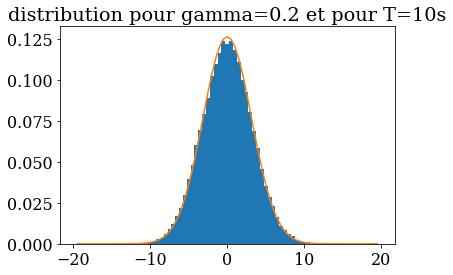

In [22]:
brownian_2(0.2,10)

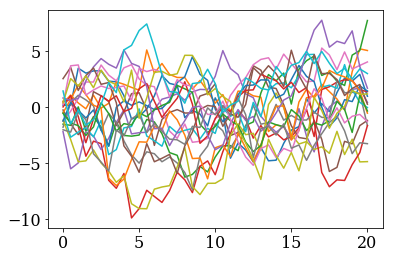

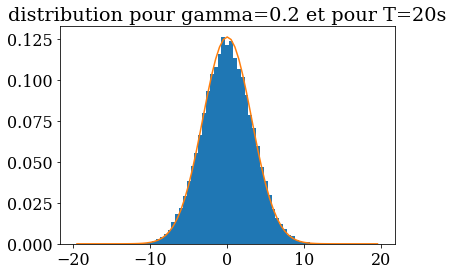

In [23]:
brownian_2(0.2,20)

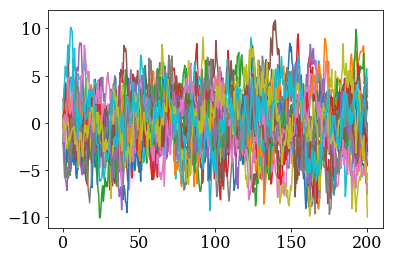

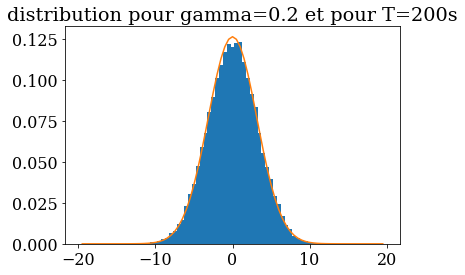

In [24]:
brownian_2(0.2,200)

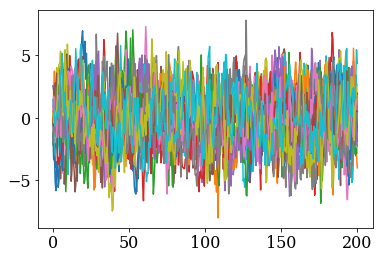

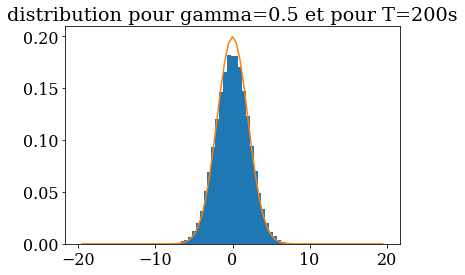

In [25]:
brownian_2(0.5,200)

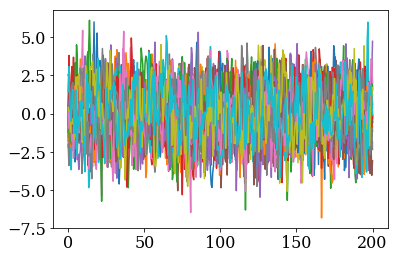

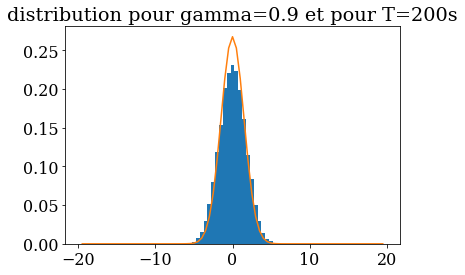

In [26]:
brownian_2(0.9,200)

Nous observons bien que lorsque le temps tend vers l'infini, les particules se stabilisent dans une distribution d'équilibre étant une gaussienne d'écart-type $\alpha/\gamma$. Nous avons trouvé cette valeur théorique dans l'article suivant : https://ocw.mit.edu/courses/mathematics/18-366-random-walks-and-diffusion-fall-2006/study-materials/lec14.pdf après discussion avec d'autres binomes. Néanmoins, puisque nous ne sommes pas exactement à l'infini, on remarque que le plot n'est pas parfait, et que plus nous augmentons la valeur de la $\gamma$, moins la concordance entre la distribution et le plot sera bonne. Il y'aurait donc des correction à appliquer à la courbe d'ajustement. Malheureusement, nous n'avons pas eu le temps d'approfondir la question. Nous pouvons tout de même remarquer que dans un domaine de $\gamma $ pas trop grand et à partir d'un temps d'au moins $10s$, cela reste une approximation correcte.

En conclusion, nous avons pu observer dans ce challenge que les terme $c$ et $\gamma$ agissent différemment sur la diffusion de la goutte de colorant : alors que $c$ influence la position du centre de la gaussienne et non sa forme pour un temps de diffusion T fixé, le facteur $\gamma$ lui ne permet pas de décentrer la gaussienne de sa valeur initiale 0, mais plutot d'influencer la manière selon laquelle les molécules se diffusent autour de leur position initiale. De plus il est très visible sur les distributions précédentes que si l'on prend un temps T fixé à 200 s par exemple, le coefficient de friction $\gamma$ influence effectivement la distribution, à l'inverse du coefficient $c$.

## Challenge 3 - Ising Model 

Le modèle Ising permet l'étude des transition magnétiques que peuvent subir les matériaux ferromagnétique lorsque ceux-ci atteignent une certaine température $Tc$ , la température de Curie. Le ferromagnétique est décrit par une série de dipoles orientés positivement ( up ) ou négativement ( down). 
### Partie I
*Check that this is not a coincidence and that the metropolis algorithm gives the correct ratio of "ups" and "downs" for different lattice configurations. You may use the following routine to generate different ones with random initial dipole orientations.*


### Partie II
*Perform a series of runs with $\alpha \in [0 1]$ and plot the average energy of the system and its magnetisation as a function of $\alpha$. Estimate the critical value of $\alpha$ at which the phase transition occurs. Is it compatible with Onsager's exact solution for the system?*
*Redo the analysis with a different set of boundary conditions for the lattice and a different initial lattice configuration. For example, you could assume that on the borders all the spins are pointing upwards on the borders while they are randomly oriented in the bulk.*

### Partie I

In [27]:
def initial_state(nx,ny):
    
    r = numpy.random.randint(0,2,(nx,ny))
    
    # nous assignons au départ un spin négatif
    r[r==0] =-1

    return r

La fonction initial_state permet de créer un tableau de valeurs $+1,-1 $ selon l'orientation des dipoles. Ainsi on aura un tableau de $(nx * ny)$ valeurs. Cette fonction permet surtout d'avoir toujours des conditions initiales différentes à chaque fois.

In [28]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])
    return energy

La fonction energy_at_site permet d'obtenir pour un spin donné l'énergie en position $(ix,iy)$, pour un tableau de valeur avec des conditions périodiques aux bords.

In [29]:
def metropolis_at_site(sp,alpha,ix,iy):
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped-energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

La fonction "metropolis_at_site" permet d'inverser le sens d'un dipole en position (ix,iy) avec la probabilité $p_{\rm flip}=e^{-\Delta E}$. Cet algorithme est connu sous le nom de Metropolis Monte Carlo. On peut alors générer des états et vérifier que le ratio de "ups" et de "downs" sont bien correctes pour différentes configurations des dipoles:

In [30]:
nx=10
ny=10

alpha = 0.1

Définissons une fonction qui va permettre de calculer et de renvoyer les valeurs du taux $up/down$ et de $p_{\rm flip}$. Si ces deux valeurs correspondent, alors le ratio est correcte.

In [31]:
def ratio_updown():
    NMC = 100000
    states = numpy.empty(NMC+1)
    sp1 = initial_state(nx,ny)

    sp2=sp1.copy()
    states[0]=sp2[5,5]
        
    for n in range(0,NMC):

        metropolis_at_site(sp2,alpha,5,5)
        states[n]=sp2[5,5]
    
    ups = numpy.extract(states==1, states).size
    downs = NMC - ups
    p_flip = numpy.exp(energy_at_site(sp1,alpha,-1,5,5) - energy_at_site(sp1,alpha,1,5,5))
    return float(ups)/(float(downs)) , p_flip

In [32]:
print ratio_updown()

(1.0, 1.0)


In [33]:
print ratio_updown()

(1.0, 1.0)


In [34]:
print ratio_updown()

(1.4917150474671717, 1.4918246976412703)


In [35]:
print ratio_updown()

(1.0, 1.0)


Puisque l'on a un échantillon fini de statistiques, les valeurs correspondent au 100ème près. Elles correspondraient exactement si l'échantillon tendait vers l'infini. On en déduit que les valeurs correspondent bien et si on relance plusieurs fois le programme initial_state pour avoir des configurations différentes, on a bien toujours que la deuxième valeur $p_{\rm flip}=ups/downs$ ( la première valeur) au centième près. Ce n'est donc pas une coïncidence.

### Partie II

Afin de montrer que la transition du matériel ferromagnétique a bien lieu, nous commençons par faire tourner l'algorithme de metropolis pour plusieurs valeurs de $\alpha$ en partant d'un ensemble initial de spins orientés positivement.

In [36]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()   
    return states        

In [37]:
nx = 100
ny = 100

In [38]:
NMC=100
sp = numpy.ones([nx,ny]) #Tous up initialement
alpha=0.05
states_0_05 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [39]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.2
states_0_2 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [40]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.5
states_0_5 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [41]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.7
states_0_7 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

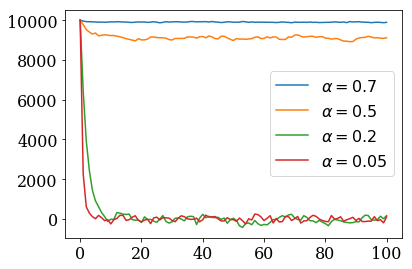

In [42]:
pyplot.figure()
pyplot.plot(states_0_7.sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.plot(states_0_5.sum(axis=(1,2)),label=r'$\alpha=0.5$')
pyplot.plot(states_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states_0_05.sum(axis=(1,2)),label=r'$\alpha=0.05$')
pyplot.legend()
pyplot.tight_layout()

Nous observons qu'il existe bien une valeur $\alpha$ entre $0.2$ et $0.5$ ( à laquelle on peut associer une température) , à partir de laquelle le ferromagnétique va avoir ses dipoles qui s'annulent et donc , le ferromagnétique n'est plus aimanté.

#### Calcul des moyennes de la magnétisation et de l'énergie en fonction de la valeur de $\alpha$

Les moyennes de l'énergie et de la magnétisation sont données par :

$$<E> = \frac{\sum_k E_k}{N_k}$$
$$<M> = \frac{\sum_k M_k}{N_k}$$

Nous réalisons donc deux programmes qui calculent la moyenne sur chaque site et pour chaque état de l'énergie et de la magnétisation. On définit aussi deux autres programmes qui permettent de dessiner les évolutions des moyennes en fonction de $\alpha$.

In [43]:
nx = 10
ny = 10
NMC = 100
N = 50

**Remarque :** afin d'avoir des valeurs correctes sur les moyennes, on choisit de sommer sur tous les états à partir de 25, ainsi on retire la zone instable des valeurs de la magnétisation et de l'énergie (Cf graphe précédent).

In [44]:
def average_M(alpha,sp):
    MX=0
    M=0
    sp3 = sp.copy()
    states = ising_model_metropolis(sp3,NMC,nx,ny,alpha)
    for k in range(25,NMC):
        for i in range (nx):
            for j in range (ny):
                MX = MX + states[k,i,j]
        M = M + MX
    M = M/((NMC-25)*nx*ny)
    return M

In [45]:
def plot_M(sp,N):
    alpha_array= numpy.linspace(0,1,N)
    aver_M=numpy.empty(N)
    for l in range (N):
        alpha=alpha_array[l]
        aver_M[l]=average_M(alpha,sp)
  

    pyplot.figure()
    pyplot.plot(alpha_array,aver_M)
    pyplot.xlim(0,1)
    pyplot.tight_layout()
    pyplot.title('<M>')
    pyplot.xlabel('alpha')

In [46]:
def average_E(alpha,sp):
    E = 0
    sp1 = sp.copy()
    states = ising_model_metropolis(sp1,NMC,nx,ny,alpha)
    for k in range (25,NMC):
        for i in range (nx):
            for j in range (ny):
                E = E + energy_at_site(states[k],alpha,states[k,i,j],i,j)        
    E = E/((NMC-25)*nx*ny)
    return E

In [47]:
def plot_E(sp,N):
    alpha_array= numpy.linspace(0,1,N)
    aver_E=numpy.empty(N)
    for l in range (N):
        alpha=alpha_array[l]
        aver_E[l]=average_E(alpha,sp)
  

    pyplot.figure()
    pyplot.plot(alpha_array,aver_E)
    pyplot.xlim(0,1)
    pyplot.tight_layout()
    pyplot.title('<E>')
    pyplot.xlabel('alpha')

In [48]:
sp=numpy.ones([nx,ny]) #on choisit un état initial où tous les dipoles sont up

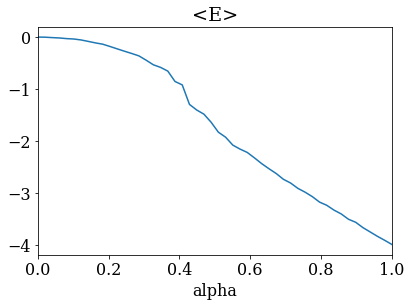

In [49]:
plot_E(sp,N)

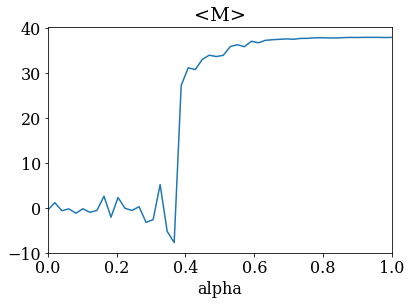

In [50]:
plot_M(sp,N)

On estime approximativement que la valeur critique de $\alpha = J/k_b T$ à laquelle la transition à lieu est entre 0.42 et 0.45. Sachant que la solution exacte de Onsager pour le Ising Model est de $\alpha = 0.44$, notre valeur est compatible pour ce système.

(source : https://homepages.warwick.ac.uk/~masdbn/9511003.pdf, page 7, "Fifty Years of the Exact solution of the Two-dimensional
Ising Model by Onsager")



Maintenant, prenons différentes configurations initiales et de conditions de bord pour voir l'évolution :

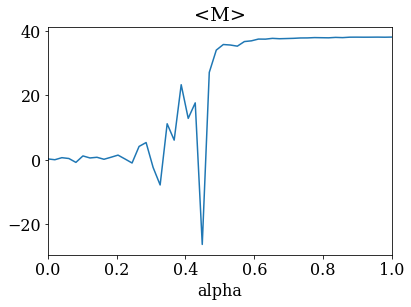

In [51]:
sp = initial_state(nx,ny)
# tous les dipoles sur les bords sont ups. Les dipoles au centre sont orientés aléatoirement
for i in range (0,nx):
    sp[i,0] = 1
    sp[i,-1] = 1
    sp[0,i] = 1
    sp[-1,i] = 1
plot_M(sp,N)



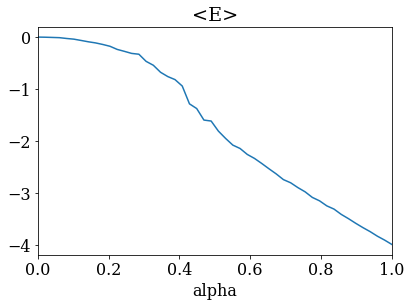

In [52]:
sp = initial_state(nx,ny)
for i in range (0,nx):
    sp[i,0] = 1
    sp[i,-1] = 1
    sp[0,i] = 1
    sp[-1,i] = 1
plot_E(sp,N)

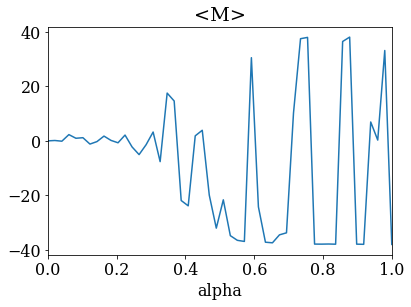

In [53]:
#tous les dipoles sont orientés aléatoirement
sp = initial_state(nx,ny)    
plot_M(sp,N)

Puisqu'ici tous les spins sont orientés aléatoirement, la valeur de la magnétisation va osciller autour de zéro.

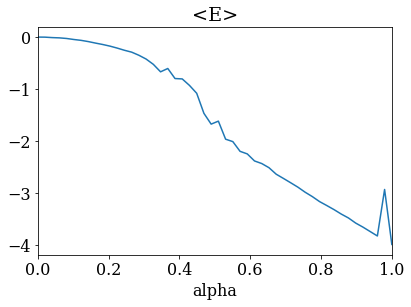

In [54]:
plot_E(sp,N)

Nous observons pour d'autres configurations initiales plus aléatoires la même transition mais celle-ci est beaucoup moins nette, surtout pour la magnétisation qui fluctue. La transition a toujours lieu aux environs de $0.4$,le modèle Ising est donc une représentation correcte du phénomère quelle que soit la configuration initiale.

# Conclusion

Ce module avait pour but de modéliser certains phénomènes physique à l'aide d'outils statistiques. Cela nous a demandé une bonne compréhension de la théorie d'abord afin d'analyser les résultats des différents modèles. Malheureusement, il y a un manque d'approfondissement sur certains points par manque de temps. Néanmoins, nos résultats concordent avec nos prédictions à chaque fois que nous les avons discutés. Nous avons donc des raisons d'affirmer que malgré quelques imperfections, nos études sont correctes et que le but du travail est atteint.